This file is for GC_LN project's automated workflow 

Create 'IS.GC_LN_sample_preprocess.xlsx' file, the modified version of 'IS.GC LN sample 현황.~.xlsx' file.
In the original file, delete the 1st row and also remove the unnecessary rows at bottom.

In [255]:
wordking_dir = r'G:\My Drive\Projects\Public\gastric_cancer\GC_LN'
import os
import pandas as pd
os.chdir(wordking_dir)

# Import the sheet named 'IS_GC c LN_data' from 'IS.GC_LN_sample_preprocess.xlsx' from the current working directory
# Reading the Excel file with specified sheet name
gc_ln_data = pd.read_excel('IS.GC_LN_sample_preprocess.xlsx', sheet_name='IS_GC c LN_data')

# Display the first few rows to verify the data
print(gc_ln_data.head())

  Interstella \nCohort Interstella_\nNew labeling WES WTS scRNA-seq  \
0       Interstella_GC               IS_GC_01_LN1   X   X       NaN   
1       Interstella_GC                 IS_GC_01_N   X   X       NaN   
2       Interstella_GC                 IS_GC_01_T   X   X       NaN   
3       Interstella_GC               IS_GC_02_LN1   X   X       NaN   
4       Interstella_GC                 IS_GC_02_N   X   X       NaN   

       Sample No. Flag      Diagnosis Date of surgery     Name of surgery  \
0  Stomach ca 001  NaN  Gastic cancer      2023-09-12  distal gastrectomy   
1  Stomach ca 001  NaN  Gastic cancer      2023-09-12  distal gastrectomy   
2  Stomach ca 001    A  Gastic cancer      2023-09-12  distal gastrectomy   
3  Stomach ca 002  NaN  Gastic cancer      2023-09-26  distal gastrectomy   
4  Stomach ca 002  NaN  Gastic cancer      2023-09-26  distal gastrectomy   

   ... Pathology1 Pathology2 Pathology3  Lauren \nclassification\n(type)  \
0  ...        SRC        NaN      

In [256]:
# Rename the column
gc_ln_data.rename(columns={'Interstella_\nNew labeling': 'patient&nodes'}, inplace=True)

# Display the first few rows to verify the change
print(gc_ln_data.head())

  Interstella \nCohort patient&nodes WES WTS scRNA-seq      Sample No. Flag  \
0       Interstella_GC  IS_GC_01_LN1   X   X       NaN  Stomach ca 001  NaN   
1       Interstella_GC    IS_GC_01_N   X   X       NaN  Stomach ca 001  NaN   
2       Interstella_GC    IS_GC_01_T   X   X       NaN  Stomach ca 001    A   
3       Interstella_GC  IS_GC_02_LN1   X   X       NaN  Stomach ca 002  NaN   
4       Interstella_GC    IS_GC_02_N   X   X       NaN  Stomach ca 002  NaN   

       Diagnosis Date of surgery     Name of surgery  ... Pathology1  \
0  Gastic cancer      2023-09-12  distal gastrectomy  ...        SRC   
1  Gastic cancer      2023-09-12  distal gastrectomy  ...        SRC   
2  Gastic cancer      2023-09-12  distal gastrectomy  ...        SRC   
3  Gastic cancer      2023-09-26  distal gastrectomy  ...        ADC   
4  Gastic cancer      2023-09-26  distal gastrectomy  ...        ADC   

  Pathology2 Pathology3  Lauren \nclassification\n(type)  \
0        NaN        NaN         

In [257]:
# Remove 'IS_GC_' prefix from the 'patient&nodes' column
gc_ln_data['patient&nodes'] = gc_ln_data['patient&nodes'].str.replace('IS_GC_', '', regex=False)

# Display the first few rows to verify the change
print(gc_ln_data['patient&nodes'].head())

0    01_LN1
1      01_N
2      01_T
3    02_LN1
4      02_N
Name: patient&nodes, dtype: object


In [258]:
# Remove text after '_' in 'patient&nodes' column
gc_ln_data['patient&nodes'] = gc_ln_data['patient&nodes'].str.split('_', expand=True)[0]

# Rename 'patient&nodes' to 'patient'
gc_ln_data.rename(columns={'patient&nodes': 'patient'}, inplace=True)

# Display the first few rows to verify the changes
print(gc_ln_data[['patient', 'Tissue type 1']].head())

  patient Tissue type 1
0      01           LN1
1      01             N
2      01             T
3      02           LN1
4      02             N


In [259]:
# Check if there is a column containing 'Sample type' in its name
sample_type_col = [col for col in gc_ln_data.columns if 'Sample type' in col]
sample_type_col

['Sample type\nT, N, LN\n(station #)']

In [260]:
# Rename the first occurrence of 'Sample type' to 'Sample type'
gc_ln_data.rename(columns={sample_type_col[0]: 'Sample type'}, inplace=True)

In [261]:
gc_ln_data[['Sample type']].head()

,Sample type
0,#4d
1,N
2,T
3,#11p
4,N


In [262]:
# # Remove all rows with 'N' or 'T' in 'Sample type' column
# gc_ln_data = gc_ln_data[~gc_ln_data['Sample type'].str.contains('N|T', na=False)]
# gc_ln_data[['Sample type']].head()

In [263]:
# Remove '#' from all values in 'Sample type' column
gc_ln_data['Sample type'] = gc_ln_data['Sample type'].str.replace('#', '', regex=False)
gc_ln_data[['Sample type']].head()

,Sample type
0,4d
1,N
2,T
3,11p
4,N


In [264]:
# Display some values under 'WES', 'WTS', 'scRNA-seq' columns
print(gc_ln_data[['WES', 'WTS', 'scRNA-seq']].head())

  WES WTS scRNA-seq
0   X   X       NaN
1   X   X       NaN
2   X   X       NaN
3   X   X       NaN
4   X   X       NaN


In [265]:
# Replace all NaN values in 'WES', 'WTS', and 'scRNA-seq' columns with 'X'
gc_ln_data[['WES', 'WTS', 'scRNA-seq']] = gc_ln_data[['WES', 'WTS', 'scRNA-seq']].fillna('X')

In [266]:
# The number of rows in the DataFrame
print(f"Number of rows in the DataFrame: {len(gc_ln_data)}")
# The number of with all values as NaN or 'X' in 'WES', 'WTS', and 'scRNA-seq' columns
print(f"Number of rows with all values 'X' in 'WES', 'WTS', and 'scRNA-seq' columns: {len(gc_ln_data[gc_ln_data[['WES', 'WTS', 'scRNA-seq']].eq('X').all(axis=1)])}")
# The number of rows with at least one value as 'O' in 'WES', 'WTS', and 'scRNA-seq' columns
print(f"Number of rows with at least one value as 'O' in 'WES', 'WTS', and 'scRNA-seq' columns: {len(gc_ln_data[gc_ln_data[['WES', 'WTS', 'scRNA-seq']].eq('O').any(axis=1)])}")

Number of rows in the DataFrame: 441
Number of rows with all values 'X' in 'WES', 'WTS', and 'scRNA-seq' columns: 41
Number of rows with at least one value as 'O' in 'WES', 'WTS', and 'scRNA-seq' columns: 400


In [267]:
# Remove rows with all values as 'X' in 'WES', 'WTS', and 'scRNA-seq' columns
gc_ln_data = gc_ln_data[~gc_ln_data[['WES', 'WTS', 'scRNA-seq']].eq('X').all(axis=1)]
# Print the number of rows after removing
print(f"Number of rows after removing rows with all values 'X' in 'WES', 'WTS', and 'scRNA-seq' columns: {len(gc_ln_data)}")

Number of rows after removing rows with all values 'X' in 'WES', 'WTS', and 'scRNA-seq' columns: 400


In [268]:
# Check the unique values in 'patient' column
gc_ln_data['patient'].unique()

array(['09', '10', '13', '14', '15', '16', '17', '18', '19', '20', '22',
       '23', '24', '26', '28', '29', '30', '31', '32', '33', '34', '35',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47',
       '48', '49', '50', '51', '53', '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '73', '74', '76', '77', '78', '79', '80'], dtype=object)

In [269]:
len(gc_ln_data['patient'].unique())

64

In [270]:
# Find the column that contains 'location' in its name
location_col = [col for col in gc_ln_data.columns if 'location' in col]
# Display the all column's name containing 'location'
print(location_col)
# Find the column that contains 'lymphovascular' in its name
lymphovascular_col = [col for col in gc_ln_data.columns if 'lymphovascular' in col]
# Display the all column's name containing 'lymphovascular'
print(lymphovascular_col)

['Tumor\nlocation1', 'Tumor\nlocation 2']
[' lymphovascular \ninvasion ']


In [271]:
# Convert the column 'Tumor\nlocation1' to 'Tumor location'
gc_ln_data.rename(columns={'Tumor\nlocation1': 'Tumor location'}, inplace=True)
gc_ln_data.rename(columns={'Tumor\nlocation 2': 'Tumor location2'}, inplace=True)
gc_ln_data.rename(columns={' lymphovascular \ninvasion ': 'lymphovascular'}, inplace=True)

# Find the column that contains 'location' in its name
location_col = [col for col in gc_ln_data.columns if 'location' in col]
# Display the all column's name containing 'location'
print(location_col)
# Find the column that contains 'lymphovascular' in its name
lymphovascular_col = [col for col in gc_ln_data.columns if 'lymphovascular' in col]
# Display the all column's name containing 'lymphovascular'
print(lymphovascular_col)

['Tumor location', 'Tumor location2']
['lymphovascular']


In [272]:
# Select necessary columns only
gc_ln_data = gc_ln_data[['patient', 'Name of surgery', 'pStage', 'Tumor location', 'Tumor location2', 'lymphovascular', 'Sample type', 'Tissue type 2', 'WES', 'WTS', 'scRNA-seq']]
# Display the first few rows to verify the changes
print(gc_ln_data.head(2))

   patient    Name of surgery    pStage Tumor location Tumor location2  \
26      09  total gastrectomy  T3N3aM0             EGJ             NaN   
27      09  total gastrectomy  T3N3aM0             EGJ             NaN   

   lymphovascular Sample type Tissue type 2 WES WTS scRNA-seq  
26        present         4sa          Meta   O   O         X  
27        present           9         Nomal   O   O         X  


In [273]:
# Show each number of unique values in 'Tissue type 2' column
print(gc_ln_data['Tissue type 2'].value_counts())

Tissue type 2
Nomal             277
Tumor              64
Meta               57
Meta vs Normal      2
Name: count, dtype: int64


There is 2 'Meta vs Normal' data in the original data but one of them is discarded due to the 'UK' filtering under the 'Sample type'. 

In [274]:
# Convert 'Meta vs Normal' to just 'Meta' in 'Tissue type 2' column
gc_ln_data['Tissue type 2'] = gc_ln_data['Tissue type 2'].str.replace('Meta vs Normal', 'Meta', regex=False)
gc_ln_data['Tissue type 2'].value_counts()

Tissue type 2
Nomal    277
Tumor     64
Meta      59
Name: count, dtype: int64

In [275]:
# Convert the column's name 'Tissue type 2' to 'meta_or_not'
gc_ln_data.rename(columns={'Tissue type 2': 'meta_or_not'}, inplace=True)

In [276]:
# Count the number of NaN values in each column
nan_counts = gc_ln_data.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
patient             0
Name of surgery     0
pStage              0
Tumor location      9
Tumor location2    32
lymphovascular     23
Sample type         0
meta_or_not         0
WES                 0
WTS                 0
scRNA-seq           0
dtype: int64


In [277]:
# Replace all NaN values with '-'
gc_ln_data.fillna('-', inplace=True)

# Count the number of NaN values in each column
nan_counts = gc_ln_data.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
patient            0
Name of surgery    0
pStage             0
Tumor location     0
Tumor location2    0
lymphovascular     0
Sample type        0
meta_or_not        0
WES                0
WTS                0
scRNA-seq          0
dtype: int64


In [278]:
# Print the all unique values in all columns
for col in gc_ln_data.columns:
    print(f"Unique values in '{col}': {gc_ln_data[col].unique()}")

Unique values in 'patient': ['09' '10' '13' '14' '15' '16' '17' '18' '19' '20' '22' '23' '24' '26'
 '28' '29' '30' '31' '32' '33' '34' '35' '37' '38' '39' '40' '41' '42'
 '43' '44' '45' '46' '47' '48' '49' '50' '51' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '76' '77' '78' '79' '80']
Unique values in 'Name of surgery': ['total gastrectomy' 'distal gastrectomy' 'subtotal gastrectomy'
 'gastrectomy']
Unique values in 'pStage': ['T3N3aM0 ' 'T1bN0M0 ' 'T4aN1M0 ' 'T1aN0M0' 'T4aN0M0' 'T4aN1M0' 'T4aN2M0'
 'T4bN2M0' 'T3N3aM0' 'T2N0M0' 'T3N2M0' 'T1bN1M0 ' 'T3N1M0  ' 'T2N2M0 '
 'T1N0M0' 'T1bN0M0' 'T4aN3bM0' 'T4aN3M0 ' 'T3N2M0  ' 'T1N0M0 ' 'T1aN0M0 '
 'T3N0M0 ' 'T2N1M0' 'T1N0M0  ' 'T4N3M0' 'T1N0N0' 'T3N3M0' 'T4N0M0'
 'T1N2M0' 'ypT0N2M1' 'T3N0M0']
Unique values in 'Tumor location': ['EGJ' 'high body' 'antrum' 'pylorus' 'body' 'low body'
 'involving entire stomach' 'cardia' 'antrum and body' '-']
Unique values in 'Tumor location2'

To do: 
1. Remove strings comes in front of '->' in 'Sample type' column
2. Remove '->' in 'Sample type' column
2. Remove any space between "'" and any string in every values

In [279]:
# Print the number of rows of the dataframe
len(gc_ln_data)

400

In [280]:
# Remove strings comes in front of '->' in 'Sample type' column
gc_ln_data['Sample type'] = gc_ln_data['Sample type'].str.split('->').str[-1]
gc_ln_data['Sample type'].unique()

array(['4sa', '9', 'N', 'T', 'UK', '2', '6', '11p', '1', '3a', '12', '4d',
       '7', '4sb', '8', '3', '11', '3-1', '3-2', '11d', '3b', '7-1',
       '7-2', '4d-1', '4d-2', '5', '6-1', '6-2', '9-1', '9-2', '3a-1',
       '3a-2', '3b-1', '3b-2', ' 4sb', ' 4d', ' 4sb-1', ' 4sb-2', ' 4d-1',
       ' 4d-2', '4d-3', '10-1', '10-2', '1-1', '1-2', '10', '11p-1',
       '12-1', '4sa-1', '4sa-2', '4sb-1', '4sb-2', '8-1', '8-2', '1-3',
       '11d-1', '12-2', '2-1', '5-1', '5-2', '6-3', '11p-1 ', '11p-2 ',
       '12-1 ', '2-1 ', '3a-1 ', '3a-2 ', '4d-1 ', '4d-2 ', '4d-3 ',
       '4sb-1 ', '6-1 ', '6-2 ', '7-1 ', '9-1 ', '9-2 ', ' 2-1', '2-2'],
      dtype=object)

Finding Sample data starts with '3'

In [281]:
# Find Sample type that starts with '3'
samples_starting_with_3 = gc_ln_data[gc_ln_data['Sample type'].str.startswith('3')]

# Sort the dataframe by 'patient' (ascending) and 'Sample type' (descending)
samples_starting_with_3 = samples_starting_with_3.sort_values(by=['patient', 'Sample type'], 
                                                           ascending=[True, False])

# Display the results
samples_starting_with_3

,patient,Name of surgery,pStage,Tumor location,Tumor location2,lymphovascular,Sample type,meta_or_not,WES,WTS,scRNA-seq
43,16,distal gastrectomy,T4aN1M0,pylorus,LC,present,3a,Nomal,O,O,X
60,23,distal gastrectomy,T3N2M0,body,LC,present,3a,Meta,O,O,X
99,37,total gastrectomy,T4aN3M0,antrum,"GC, AW-PW",present,3,Meta,O,O,X
107,38,distal gastrectomy,T3N2M0,antrum,"LC, AW-PW",present,3a,Nomal,O,O,X
118,41,distal gastrectomy,T1aN0M0,antrum,PW,not identified,3-2,Nomal,O,O,X
117,41,distal gastrectomy,T1aN0M0,antrum,PW,not identified,3-1,Nomal,O,O,X
125,42,total gastrectomy,T3N3aM0,cardia,LC,present,3a,Meta,O,O,X
132,43,subtotal gastrectomy,T4aN3bM0,antrum and body,-,present,3b,Meta,O,O,X
131,43,subtotal gastrectomy,T4aN3bM0,antrum and body,-,present,3,Meta,O,O,X
143,45,distal gastrectomy,T4aN1M0,antrum,"GC-LC, AW-PW",present,3b,Nomal,O,O,X


In [282]:
# Remove any space between "'" and any string in every values
for col in gc_ln_data.columns:
    if gc_ln_data[col].dtype == 'object':  # Only process string columns
        gc_ln_data[col] = gc_ln_data[col].str.strip()

# Print the all unique values in all columns
for col in gc_ln_data.columns:
    print(f"Unique values in '{col}': {gc_ln_data[col].unique()}")

Unique values in 'patient': ['09' '10' '13' '14' '15' '16' '17' '18' '19' '20' '22' '23' '24' '26'
 '28' '29' '30' '31' '32' '33' '34' '35' '37' '38' '39' '40' '41' '42'
 '43' '44' '45' '46' '47' '48' '49' '50' '51' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '76' '77' '78' '79' '80']
Unique values in 'Name of surgery': ['total gastrectomy' 'distal gastrectomy' 'subtotal gastrectomy'
 'gastrectomy']
Unique values in 'pStage': ['T3N3aM0' 'T1bN0M0' 'T4aN1M0' 'T1aN0M0' 'T4aN0M0' 'T4aN2M0' 'T4bN2M0'
 'T2N0M0' 'T3N2M0' 'T1bN1M0' 'T3N1M0' 'T2N2M0' 'T1N0M0' 'T4aN3bM0'
 'T4aN3M0' 'T3N0M0' 'T2N1M0' 'T4N3M0' 'T1N0N0' 'T3N3M0' 'T4N0M0' 'T1N2M0'
 'ypT0N2M1']
Unique values in 'Tumor location': ['EGJ' 'high body' 'antrum' 'pylorus' 'body' 'low body'
 'involving entire stomach' 'cardia' 'antrum and body' '-']
Unique values in 'Tumor location2': ['-' 'PW' 'LC-GC,  AW-PW' 'LC' 'GC' 'GC-LC' 'AW' '' 'GC, AW-PW'
 'LC, AW-PW' 'GC-LC, AW-PW

In [283]:
# Function to wrap values containing commas with parentheses
def wrap_with_parentheses(value):
    if isinstance(value, str) and ',' in value:
        return f"({value})"
    return value

# Apply the function to the 'Tumor location2' column
gc_ln_data['Tumor location2'] = gc_ln_data['Tumor location2'].apply(wrap_with_parentheses)

# Print the all unique values in all columns
for col in gc_ln_data.columns:
    print(f"Unique values in '{col}': {gc_ln_data[col].unique()}")

Unique values in 'patient': ['09' '10' '13' '14' '15' '16' '17' '18' '19' '20' '22' '23' '24' '26'
 '28' '29' '30' '31' '32' '33' '34' '35' '37' '38' '39' '40' '41' '42'
 '43' '44' '45' '46' '47' '48' '49' '50' '51' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '76' '77' '78' '79' '80']
Unique values in 'Name of surgery': ['total gastrectomy' 'distal gastrectomy' 'subtotal gastrectomy'
 'gastrectomy']
Unique values in 'pStage': ['T3N3aM0' 'T1bN0M0' 'T4aN1M0' 'T1aN0M0' 'T4aN0M0' 'T4aN2M0' 'T4bN2M0'
 'T2N0M0' 'T3N2M0' 'T1bN1M0' 'T3N1M0' 'T2N2M0' 'T1N0M0' 'T4aN3bM0'
 'T4aN3M0' 'T3N0M0' 'T2N1M0' 'T4N3M0' 'T1N0N0' 'T3N3M0' 'T4N0M0' 'T1N2M0'
 'ypT0N2M1']
Unique values in 'Tumor location': ['EGJ' 'high body' 'antrum' 'pylorus' 'body' 'low body'
 'involving entire stomach' 'cardia' 'antrum and body' '-']
Unique values in 'Tumor location2': ['-' 'PW' '(LC-GC,  AW-PW)' 'LC' 'GC' 'GC-LC' 'AW' '' '(GC, AW-PW)'
 '(LC, AW-PW)' '(GC-LC

In [284]:
# Under the 'Tumor location' column, replace '  ' with ' '.
gc_ln_data['Tumor location'] = gc_ln_data['Tumor location'].str.replace(r'\s{2,}', ' ', regex=True)

# Print the all unique values in all columns
for col in gc_ln_data.columns:
    print(f"Unique values in '{col}': {gc_ln_data[col].unique()}")

Unique values in 'patient': ['09' '10' '13' '14' '15' '16' '17' '18' '19' '20' '22' '23' '24' '26'
 '28' '29' '30' '31' '32' '33' '34' '35' '37' '38' '39' '40' '41' '42'
 '43' '44' '45' '46' '47' '48' '49' '50' '51' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '76' '77' '78' '79' '80']
Unique values in 'Name of surgery': ['total gastrectomy' 'distal gastrectomy' 'subtotal gastrectomy'
 'gastrectomy']
Unique values in 'pStage': ['T3N3aM0' 'T1bN0M0' 'T4aN1M0' 'T1aN0M0' 'T4aN0M0' 'T4aN2M0' 'T4bN2M0'
 'T2N0M0' 'T3N2M0' 'T1bN1M0' 'T3N1M0' 'T2N2M0' 'T1N0M0' 'T4aN3bM0'
 'T4aN3M0' 'T3N0M0' 'T2N1M0' 'T4N3M0' 'T1N0N0' 'T3N3M0' 'T4N0M0' 'T1N2M0'
 'ypT0N2M1']
Unique values in 'Tumor location': ['EGJ' 'high body' 'antrum' 'pylorus' 'body' 'low body'
 'involving entire stomach' 'cardia' 'antrum and body' '-']
Unique values in 'Tumor location2': ['-' 'PW' '(LC-GC,  AW-PW)' 'LC' 'GC' 'GC-LC' 'AW' '' '(GC, AW-PW)'
 '(LC, AW-PW)' '(GC-LC

In [285]:
# Print the number of rows of the dataframe
len(gc_ln_data)

400

In [286]:
# Get the unique values in 'Sample type' column and sort them
unique_sample_types = gc_ln_data['Sample type'].unique()
print(sorted(unique_sample_types))

['1', '1-1', '1-2', '1-3', '10', '10-1', '10-2', '11', '11d', '11d-1', '11p', '11p-1', '11p-2', '12', '12-1', '12-2', '2', '2-1', '2-2', '3', '3-1', '3-2', '3a', '3a-1', '3a-2', '3b', '3b-1', '3b-2', '4d', '4d-1', '4d-2', '4d-3', '4sa', '4sa-1', '4sa-2', '4sb', '4sb-1', '4sb-2', '5', '5-1', '5-2', '6', '6-1', '6-2', '6-3', '7', '7-1', '7-2', '8', '8-1', '8-2', '9', '9-1', '9-2', 'N', 'T', 'UK']


-> The maximum value of sample type: 12

# Segregate the dataframe by patient

In [287]:
# Count unique values in 'patient' column
gc_ln_data['patient'].nunique()
# List unique values in 'patient' column
unique_patients = gc_ln_data['patient'].unique()
# Display the unique patients
unique_patients

array(['09', '10', '13', '14', '15', '16', '17', '18', '19', '20', '22',
       '23', '24', '26', '28', '29', '30', '31', '32', '33', '34', '35',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47',
       '48', '49', '50', '51', '53', '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '73', '74', '76', '77', '78', '79', '80'], dtype=object)

In [288]:
# Type of 'unique_patients'
print(type(unique_patients))

<class 'numpy.ndarray'>


In [289]:
# Create a dictionary to store individual dataframes for each patient
patient_dataframes = {}

# Iterate through unique patient IDs and create a dataframe for each
for patient_id in unique_patients:
    # Filter the original dataframe for the current patient
    patient_df = gc_ln_data[gc_ln_data['patient'] == patient_id].copy()
    # Store in dictionary with patient ID as key
    patient_dataframes[patient_id] = patient_df

# Check the number of patient dataframes created
print(f"Number of patient dataframes created: {len(patient_dataframes)}")

Number of patient dataframes created: 64


In [290]:
# Example: Access the dataframe for the first patient in unique_patients
print(patient_dataframes[unique_patients[0]].head())

   patient    Name of surgery   pStage Tumor location Tumor location2  \
26      09  total gastrectomy  T3N3aM0            EGJ               -   
27      09  total gastrectomy  T3N3aM0            EGJ               -   
28      09  total gastrectomy  T3N3aM0            EGJ               -   
29      09  total gastrectomy  T3N3aM0            EGJ               -   

   lymphovascular Sample type meta_or_not WES WTS scRNA-seq  
26        present         4sa        Meta   O   O         X  
27        present           9       Nomal   O   O         X  
28        present           N       Nomal   O   O         X  
29        present           T       Tumor   O   O         X  


In [291]:
# Example: Access the dataframe for the last patient in unique_patients
print(patient_dataframes[unique_patients[-1]].head())

    patient    Name of surgery  pStage   Tumor location Tumor location2  \
427      80  total gastrectomy  T3N0M0  antrum and body              LC   
428      80  total gastrectomy  T3N0M0  antrum and body              LC   
429      80  total gastrectomy  T3N0M0  antrum and body              LC   
430      80  total gastrectomy  T3N0M0  antrum and body              LC   
431      80  total gastrectomy  T3N0M0  antrum and body              LC   

    lymphovascular Sample type meta_or_not WES WTS scRNA-seq  
427              -         1-1       Nomal   X   X         O  
428              -        12-1       Nomal   X   X         O  
429              -        12-2       Nomal   X   X         O  
430              -         2-1       Nomal   X   X         O  
431              -        3a-1       Nomal   X   X         O  


In [292]:
# Access the dataframe by idx
PATIENT_IDX = 10
patient_dataframes[unique_patients[PATIENT_IDX]]

,patient,Name of surgery,pStage,Tumor location,Tumor location2,lymphovascular,Sample type,meta_or_not,WES,WTS,scRNA-seq
57,22,distal gastrectomy,T2N0M0,antrum,AW,absent,N,Nomal,O,O,X
58,22,distal gastrectomy,T2N0M0,antrum,AW,absent,T,Tumor,O,O,X
59,22,distal gastrectomy,T2N0M0,antrum,AW,absent,UK,Nomal,O,O,X


In [293]:
# Access the dataframe by patient ID
PATIENT_NUM = '22'
patient_dataframes[PATIENT_NUM]

,patient,Name of surgery,pStage,Tumor location,Tumor location2,lymphovascular,Sample type,meta_or_not,WES,WTS,scRNA-seq
57,22,distal gastrectomy,T2N0M0,antrum,AW,absent,N,Nomal,O,O,X
58,22,distal gastrectomy,T2N0M0,antrum,AW,absent,T,Tumor,O,O,X
59,22,distal gastrectomy,T2N0M0,antrum,AW,absent,UK,Nomal,O,O,X


Sort for slide by Metastatis count
1. With patient
2. With unique LN

In [294]:
# Sort patient IDs by the occurence of 'Meta' in 'meta_or_not' column in a dataframe containing patient IDs and number of 'Meta' occurences
# Count the occurrences of 'Meta' for each patient
meta_counts = gc_ln_data[gc_ln_data['meta_or_not'] == 'Meta'].groupby('patient').size()

# Create a DataFrame for better display
meta_df = pd.DataFrame({'patient': meta_counts.index, 'meta_count': meta_counts.values})

# Sort by meta_count in descending order
sorted_meta_df = meta_df.sort_values('meta_count', ascending=False)

# Display the sorted DataFrame
print("Patients sorted by number of 'Meta' occurrences:")
# Sort first by meta_count (descending) and then by patient (ascending)
sorted_meta_df = meta_df.sort_values(['meta_count', 'patient'], ascending=[False, True])
display(sorted_meta_df)

# Store sorted patient IDs for later use if needed
sorted_patients = sorted_meta_df['patient'].tolist()

Patients sorted by number of 'Meta' occurrences:


,patient,meta_count
21,76,13
4,35,5
8,43,5
20,74,5
5,37,4
7,42,4
16,66,4
22,77,3
18,71,2
0,09,1


In [295]:
# Delete after '-' and '-' in 'Samlple type' column
gc_ln_data['Sample type'] = gc_ln_data['Sample type'].str.split('-').str[0]

In [296]:
# Sort Sample types by the occurrence of 'Meta' in 'meta_or_not' column
# Count the occurrences of 'Meta' for each Sample type
sample_meta_counts = gc_ln_data[gc_ln_data['meta_or_not'] == 'Meta'].groupby('Sample type').size()

# Create a DataFrame for better display
sample_meta_df = pd.DataFrame({'Sample type': sample_meta_counts.index, 'meta_count': sample_meta_counts.values})

# Sort first by meta_count (descending) and then by Sample type (ascending)
sorted_sample_meta_df = sample_meta_df.sort_values(['meta_count', 'Sample type'], ascending=[False, True])



# Count also the total occurrences of each Sample type (regardless of meta status)
sample_total_counts = gc_ln_data.groupby('Sample type').size()
sample_meta_df['total_count'] = sample_meta_df['Sample type'].map(sample_total_counts)
sample_meta_df['meta_ratio'] = sample_meta_df['meta_count'] / sample_meta_df['total_count']

# Sort by meta ratio and then by sample type
sorted_by_ratio_df = sample_meta_df.sort_values(['total_count', 'meta_count'], ascending=[False, False])



# Store sorted sample types for later use if needed
sorted_samples = sorted_sample_meta_df['Sample type'].tolist()
sorted_samples_by_ratio = sorted_by_ratio_df['Sample type'].tolist()

# Display the sorted DataFrame
print("Sample types sorted by number of 'Meta' occurrences:")
display(sorted_sample_meta_df)
print("\nSample types sorted by 'Meta' ratio:")
display(sorted_by_ratio_df[['Sample type', 'meta_count', 'total_count', 'meta_ratio']].reset_index(drop=True))

Sample types sorted by number of 'Meta' occurrences:


,Sample type,meta_count
7,3a,7
8,3b,7
13,7,6
12,6,5
10,4sa,4
14,8,4
15,9,4
0,1,3
1,10,3
5,2,3



Sample types sorted by 'Meta' ratio:


,Sample type,meta_count,total_count,meta_ratio
0,3a,7,32,0.218750
1,4d,3,32,0.093750
2,7,6,26,0.230769
3,1,3,26,0.115385
4,6,5,24,0.208333
5,8,4,21,0.190476
6,9,4,17,0.235294
7,12,2,16,0.125000
8,3b,7,15,0.466667
9,4sa,4,9,0.444444


In [297]:
# Show the rows with exactly '3' in 'Sample type' column
gc_ln_data[gc_ln_data['Sample type'] == '3']

,patient,Name of surgery,pStage,Tumor location,Tumor location2,lymphovascular,Sample type,meta_or_not,WES,WTS,scRNA-seq
99,37,total gastrectomy,T4aN3M0,antrum,"(GC, AW-PW)",present,3,Meta,O,O,X
117,41,distal gastrectomy,T1aN0M0,antrum,PW,not identified,3,Nomal,O,O,X
118,41,distal gastrectomy,T1aN0M0,antrum,PW,not identified,3,Nomal,O,O,X
131,43,subtotal gastrectomy,T4aN3bM0,antrum and body,-,present,3,Meta,O,O,X
155,46,distal gastrectomy,T2N1M0,body,PW,absent,3,Nomal,O,O,X
197,53,total gastrectomy,T1N0M0,body,PW,absent,3,Nomal,O,O,X
198,53,total gastrectomy,T1N0M0,body,PW,absent,3,Nomal,O,O,X
264,63,distal gastrectomy,T1N0N0,body,LC,not identified,3,Nomal,O,O,X


In [298]:
# Sort the patient IDs that have 1 in 'meta_count' in ascending order
# Extract patient IDs with meta_count of 1
patients_with_meta_1 = sorted_meta_df[sorted_meta_df['meta_count'] == 1]['patient'].tolist()

# Sort in ascending order
sorted_patients_1 = sorted(patients_with_meta_1)

# Display the sorted patient IDs
print("Patients with meta_count of 1 (sorted):")
print(sorted_patients_1)

Patients with meta_count of 1 (sorted):
['09', '13', '17', '23', '38', '45', '46', '57', '60', '61', '62', '64', '67', '73']


In [299]:
# Sort the patient IDs that have 2 in 'meta_count' in ascending order
# Extract patient IDs with meta_count of 2
patients_with_meta_2 = sorted_meta_df[sorted_meta_df['meta_count'] == 2]['patient'].tolist()

# Sort in ascending order
sorted_patients_2 = sorted(patients_with_meta_2)

# Display the sorted patient IDs
print("Patients with meta_count of 2 (sorted):")
print(sorted_patients_2)

Patients with meta_count of 2 (sorted):
['71']


In [300]:
# Print the table of unique values in 'Name of surgery' column
gc_ln_data['Name of surgery'].value_counts()

Name of surgery
distal gastrectomy      221
total gastrectomy       162
gastrectomy               9
subtotal gastrectomy      8
Name: count, dtype: int64

In [301]:
# Print the rows with 'gastrctomy' only in 'Name of surgery' column
gc_ln_data[gc_ln_data['Name of surgery'] == 'gastrctomy']

,patient,Name of surgery,pStage,Tumor location,Tumor location2,lymphovascular,Sample type,meta_or_not,WES,WTS,scRNA-seq


In [302]:
# # For showing unmapped data
# PATIENT = '76'
# MAPPED = ['4d-1', '9-1', '9-2', '10-1', '10-2']
# # Unmapped data
# unmapped_data = gc_ln_data[~gc_ln_data['Sample type'].isin(MAPPED) & (gc_ln_data['patient'] == PATIENT)]
# print(", ".join(unmapped_data['Sample type'].tolist()))

For Alligning with auto-pptx-mapping

In [303]:
# In Sample type column, manually change values below
# 8 -> 8a, (3a | 3b) -> 3, 12 -> 12a
# Function to standardize sample types
def standardize_sample_type(sample_type):
    # Convert to string first (just in case)
    sample_type = str(sample_type)
    
    # Apply transformations
    if sample_type == '8':
        return '8a'
    # elif sample_type in ['3a', '3b']:
    #     return '3'
    elif sample_type == '12':
        return '12a'
    else:
        return sample_type

# Apply the transformation to all patient dataframes
for patient_id in unique_patients:
    # Get the dataframe for the current patient
    patient_df = patient_dataframes[patient_id]
    
    # Apply the transformation to the 'Sample type' column
    patient_df['Sample type'] = patient_df['Sample type'].apply(standardize_sample_type)
    
    # Update the dictionary
    patient_dataframes[patient_id] = patient_df

# Also update the main dataframe
gc_ln_data['Sample type'] = gc_ln_data['Sample type'].apply(standardize_sample_type)

# Print some examples to verify the changes
print("Example of transformed data:")
for i, patient_id in enumerate(unique_patients[55:60]):  # Last 5 patients
    print(f"\nPatient {patient_id} sample types:")
    print(patient_dataframes[patient_id]['Sample type'].tolist())

Example of transformed data:

Patient 71 sample types:
['1', '12a', '3a', '3b', '4d', '6', '8a', 'N', 'T']

Patient 72 sample types:
['1', '3a-1', '3a-2', '4sb', '4d', '8a', 'N', 'T']

Patient 73 sample types:
['1', '10', '12a', '3a', '7', '8a', '9', 'N', 'T']

Patient 74 sample types:
['1-1', '1-2', '11p-1', '12-1', '3b-1', '3b-2', '4d-1', '4d-2', '4sa-1', '4sa-2', '4sb-1', '4sb-2', '6-1', '6-2', '8-1', '8-2', 'N', 'T']

Patient 76 sample types:
['1-2', '1-3', '10-1', '10-2', '11d-1', '12-1', '12-2', '2-1', '3a-1', '3a-2', '4d-1', '4sa-1', '5-1', '5-2', '6-1', '6-2', '6-3', '8-1', '8-2', '9-1', '9-2', 'N', 'T']


In [304]:
len(patient_dataframes['45'])

13

In [305]:
for i in range(len(unique_patients)):
    print(f"Patient {unique_patients[i]}: {len(patient_dataframes[unique_patients[i]])}")

Patient 09: 4
Patient 10: 3
Patient 13: 4
Patient 14: 3
Patient 15: 3
Patient 16: 3
Patient 17: 3
Patient 18: 3
Patient 19: 3
Patient 20: 2
Patient 22: 3
Patient 23: 4
Patient 24: 3
Patient 26: 3
Patient 28: 3
Patient 29: 3
Patient 30: 4
Patient 31: 3
Patient 32: 2
Patient 33: 3
Patient 34: 3
Patient 35: 7
Patient 37: 8
Patient 38: 5
Patient 39: 3
Patient 40: 3
Patient 41: 4
Patient 42: 9
Patient 43: 8
Patient 44: 3
Patient 45: 13
Patient 46: 6
Patient 47: 8
Patient 48: 10
Patient 49: 5
Patient 50: 5
Patient 51: 7
Patient 53: 9
Patient 54: 3
Patient 55: 5
Patient 56: 8
Patient 57: 11
Patient 58: 8
Patient 59: 7
Patient 60: 6
Patient 61: 5
Patient 62: 6
Patient 63: 5
Patient 64: 7
Patient 65: 4
Patient 66: 7
Patient 67: 5
Patient 68: 4
Patient 69: 6
Patient 70: 6
Patient 71: 9
Patient 72: 8
Patient 73: 9
Patient 74: 18
Patient 76: 23
Patient 77: 17
Patient 78: 12
Patient 79: 9
Patient 80: 14


# Visualization

## Histogram

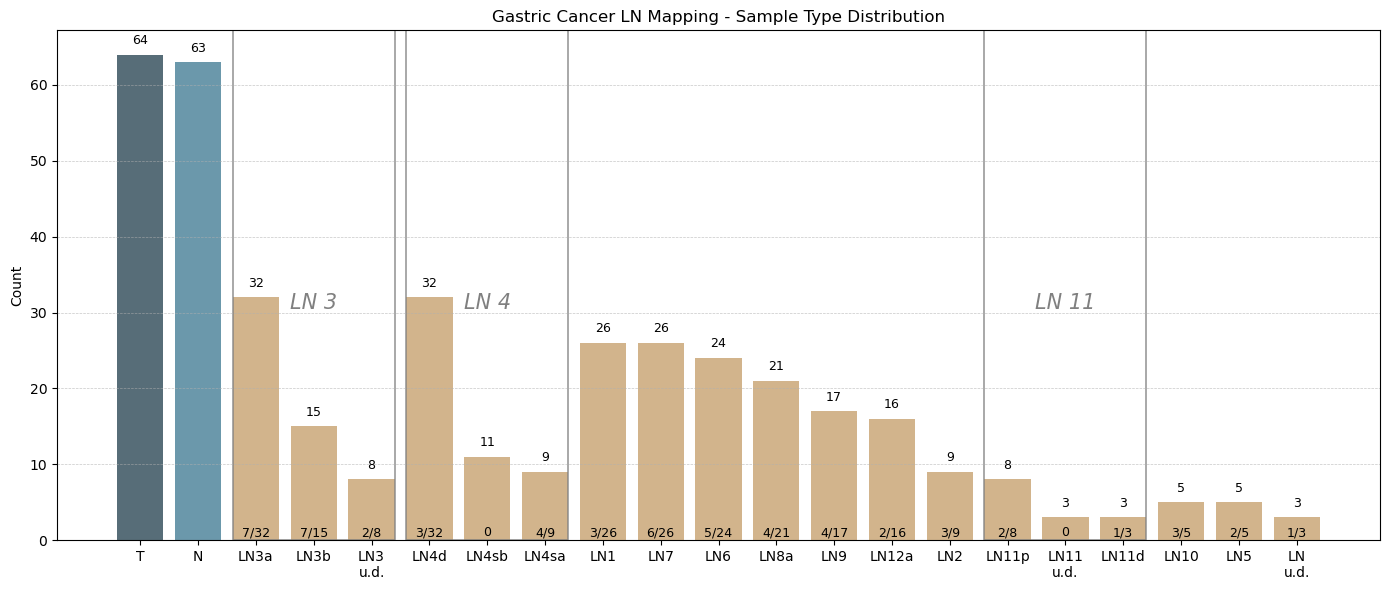

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 샘플타입 카운트
sample_counts = gc_ln_data['Sample type'].value_counts()
df = sample_counts.reset_index()
df.columns = ['Sample type', 'Count']

# LN 그룹 정의
group_map = {
    '4d': 'LN 4', '4sb': 'LN 4', '4sa': 'LN 4',
    '3a': 'LN 3', '3b': 'LN 3', '3': 'LN 3',
    '11p': 'LN 11', '11d': 'LN 11', '11': 'LN 11',
    'UK': 'LN'
}

# 그룹 지정 (기본은 Sample type 자체를 그룹으로 간주)
df['Group'] = df['Sample type'].map(group_map).fillna(df['Sample type'])

# 그룹별 최대 Count 기준 정렬 우선순위 생성
group_max_count = df.groupby('Group')['Count'].max().sort_values(ascending=False)
group_priority = {group: i for i, group in enumerate(group_max_count.index)}
df['Group Priority'] = df['Group'].map(group_priority)

# 최종 정렬: 그룹 우선순위 → 그룹 내 Count 내림차순
df = df.sort_values(by=['Group Priority', 'Count'], ascending=[True, False]).reset_index(drop=True)

# 색상 정의
bar_colors = []
for label in df['Sample type']:
    if label == 'T':
        bar_colors.append('#576D78')  # T용 색상
    elif label == 'N':
        bar_colors.append('#6B98AB')  # N용 색상
    else:
        bar_colors.append('tan')      # 기본 색상

# 막대 그래프
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(df.index, df['Count'], color=bar_colors)

# Y축 격자 추가
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# x축 레이블 처리
xtick_labels = []
for label in df['Sample type']:
    if label in ['T', 'N']:
        xtick_labels.append(label)
    elif label in ['3', '11']:
        xtick_labels.append('LN' + label + '\nu.d.')
    elif label in ['UK']:
        xtick_labels.append('LN\nu.d.')
    else:
        xtick_labels.append('LN' + label)
ax.set_xticks(df.index)
ax.set_xticklabels(xtick_labels, rotation=0, ha='center', fontsize=10)

# 막대 위에 Count 수치 표시
for idx, row in df.iterrows():
    ax.text(idx, row['Count'] + 1, str(row['Count']), ha='center', va='bottom', fontsize=9)

# 메타/노말 분수 표기
meta_counts = gc_ln_data[gc_ln_data['meta_or_not'] == 'Meta']['Sample type'].value_counts()
normal_counts = gc_ln_data[gc_ln_data['meta_or_not'] == 'Nomal']['Sample type'].value_counts()

# 메타/노말 분수 출력
for idx, row in df.iterrows():
    sample = row['Sample type']
    if sample not in ['T', 'N']:
        meta = meta_counts.get(sample, 0)
        normal = normal_counts.get(sample, 0)
        total = meta + normal
        if meta == 0:
            label = '0'
        else:
            label = f"{meta}/{total}"
        ax.text(idx, 0.1, label, ha='center', va='bottom', fontsize=9, color='black')

# LN 박스 정의
group_boxes = {
    'LN 4': ['4d', '4sb', '4sa'],
    'LN 3': ['3a', '3b', '3'],
    'LN 11': ['11p', '11d', '11'],
}

for label, members in group_boxes.items():
    indices = [df[df['Sample type'] == m].index[0] for m in members if m in df['Sample type'].values]
    if indices:
        start = min(indices)
        end = max(indices)
        rect = patches.Rectangle((start - 0.4, 0), end - start + 0.8, max(df['Count']) + 5,
                                 linewidth=1.2, edgecolor='gray', facecolor='none', linestyle='-', alpha=0.8)
        ax.add_patch(rect)
        ax.text((start + end) / 2, 30, label, ha='center', va='bottom', fontsize=15, color='gray', style='italic')  # y=30 고정

# 라벨 및 레이아웃
ax.set_ylabel('Count')
ax.set_title('Gastric Cancer LN Mapping - Sample Type Distribution')
plt.tight_layout()
plt.show()


## Pie Chart

### Tissue type

In [141]:
gc_ln_data['meta_or_not'].value_counts()

meta_or_not
Nomal    277
Tumor     64
Meta      59
Name: count, dtype: int64

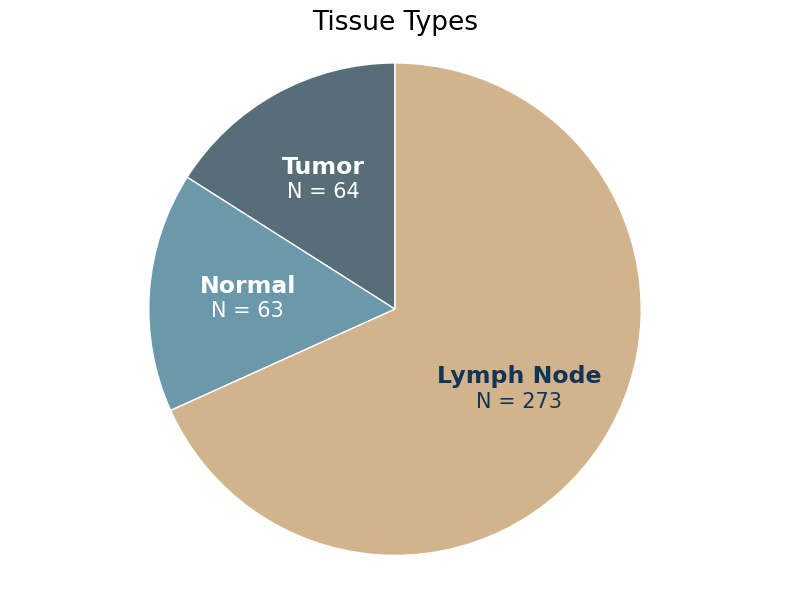

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Count occurrences
tumor_count = (gc_ln_data['Sample type'] == 'T').sum()
normal_count = (gc_ln_data['Sample type'] == 'N').sum()
ln_count = len(gc_ln_data) - tumor_count - normal_count


# Prepare data
labels = ['Tumor', 'Normal', 'Lymph Node']
sizes = [tumor_count, normal_count, ln_count]
colors = ['#576D78', '#6B98AB', 'tan']
text_colors = ['white', 'white', '#123456']  # for Tumor, Normal, LN

# Pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, _ = ax.pie(
    sizes,
    labels=None,
    colors=colors,
    startangle=90, # start from the top
    counterclock=True, # clockwise
    wedgeprops={'edgecolor': 'white'}
)

# Insert text manually inside each pie wedge
total = sum(sizes)
for i, (wedge, label, count, text_color) in enumerate(zip(wedges, labels, sizes, text_colors)):
    angle = (wedge.theta2 + wedge.theta1) / 2.0
    x = 0.6 * np.cos(np.deg2rad(angle))
    y = 0.6 * np.sin(np.deg2rad(angle))
    ax.text(x, y + 0.05, label, ha='center', va='center', fontsize=17, color=text_color, weight='bold')
    ax.text(x, y - 0.05, f"N = {count}", ha='center', va='center', fontsize=15, color=text_color)

# Equal aspect ratio ensures a perfect circle
ax.axis('equal')
plt.title('Tissue Types', fontsize=19)
plt.tight_layout()
plt.show()


### Sequencing Method

In [143]:
gc_ln_data[['WES', 'WTS', 'scRNA-seq']].head()

,WES,WTS,scRNA-seq
26,O,O,X
27,O,O,X
28,O,O,X
29,O,O,X
30,O,O,X


In [332]:
# Count the number of patients' unique occurences by WES, WTS, and scRNA-seq
# Create a dataframe to store the sequencing method counts by patient
sequencing_counts = pd.DataFrame(index=unique_patients)

# Count unique patients with WES
sequencing_counts['WES'] = [len(patient_dataframes[p][patient_dataframes[p]['WES'] == 'O']) for p in unique_patients]

# Count unique patients with WTS
sequencing_counts['WTS'] = [len(patient_dataframes[p][patient_dataframes[p]['WTS'] == 'O']) for p in unique_patients]

# Count unique patients with scRNA-seq
sequencing_counts['scRNA-seq'] = [len(patient_dataframes[p][patient_dataframes[p]['scRNA-seq'] == 'O']) for p in unique_patients]

# Calculate totals
sequencing_counts['Total samples'] = [len(patient_dataframes[p]) for p in unique_patients]

# Count patients with at least one sample of each sequencing type
wes_patients = sum(sequencing_counts['WES'] > 0)
wts_patients = sum(sequencing_counts['WTS'] > 0)
sc_patients = sum(sequencing_counts['scRNA-seq'] > 0)

print(f"\nPatients with at least one WES sample: {wes_patients}")
print(f"Patients with at least one WTS sample: {wts_patients}")
print(f"Patients with at least one scRNA-seq sample: {sc_patients}")
print(f"Total patients: {len(unique_patients)}")


Patients with at least one WES sample: 58
Patients with at least one WTS sample: 58
Patients with at least one scRNA-seq sample: 6
Total patients: 64


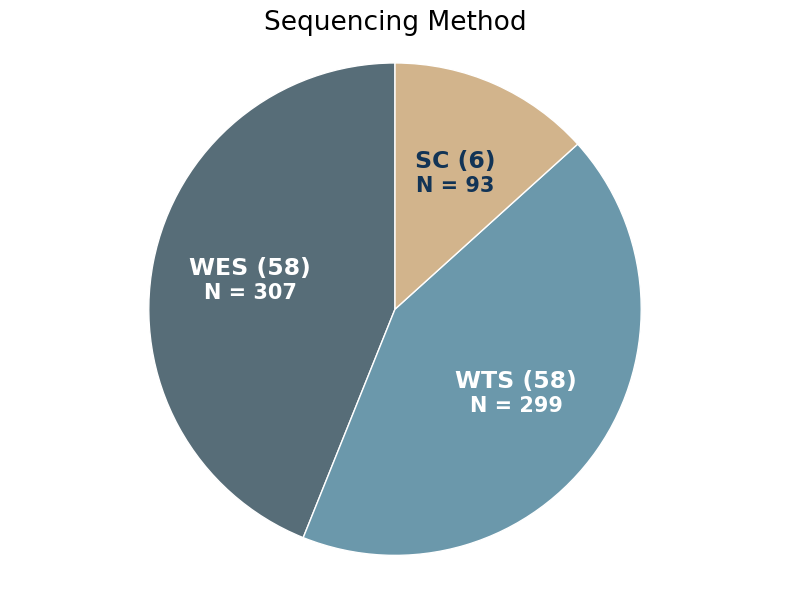

In [334]:
import matplotlib.pyplot as plt
import numpy as np

# Count occurrences

WES_count = (gc_ln_data['WES'] == 'O').sum()
WTS_count = (gc_ln_data['WTS'] == 'O').sum()
SC_count = (gc_ln_data['scRNA-seq'] == 'O').sum()

# Prepare data
labels = ['WES', 'WTS', 'SC']
patients_count = [wes_patients, wts_patients, sc_patients]
sizes = [WES_count, WTS_count, SC_count]
colors = ['#576D78', '#6B98AB', 'tan']
text_colors = ['white', 'white', '#123456']  # for Tumor, Normal, LN

# Pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, _ = ax.pie(
    sizes,
    labels=None,
    colors=colors,
    startangle=90,
    counterclock=True,
    wedgeprops={'edgecolor': 'white'}
)

# Insert text manually inside each pie wedge
total = sum(sizes)
for i, (wedge, label, num_of_patients, size, text_color) in enumerate(zip(wedges, labels, patients_count, sizes, text_colors)):
    angle = (wedge.theta2 + wedge.theta1) / 2.0
    x = 0.6 * np.cos(np.deg2rad(angle))
    y = 0.6 * np.sin(np.deg2rad(angle))
    ax.text(x, y + 0.05, f"{label} ({num_of_patients})", ha='center', va='center', fontsize=17, color=text_color, weight='bold')
    ax.text(x, y - 0.05, f"N = {size}", ha='center', va='center', fontsize=15, color=text_color, weight='bold')

# Equal aspect ratio ensures a perfect circle
ax.axis('equal')
plt.title('Sequencing Method', fontsize=19)
plt.tight_layout()
plt.show()


## Aggregation

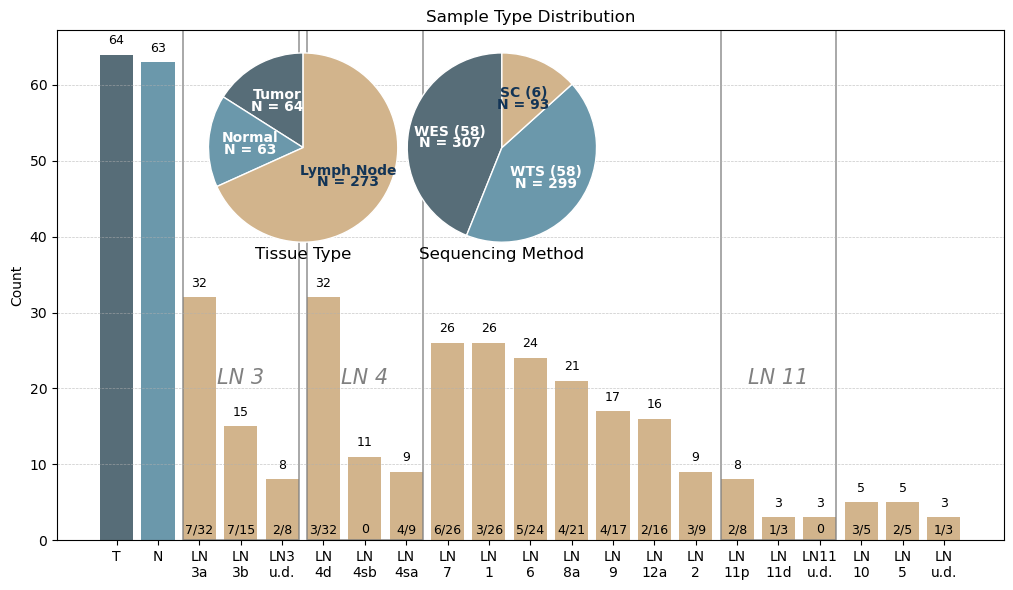

In [395]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib.gridspec as gridspec

# -----------------------------
# 1. 데이터 사전 준비
# -----------------------------

# 1. 기본 집계
sample_counts = gc_ln_data['Sample type'].value_counts()
meta_counts = gc_ln_data[gc_ln_data['meta_or_not'] == 'Meta']['Sample type'].value_counts()
normal_counts = gc_ln_data[gc_ln_data['meta_or_not'] == 'Nomal']['Sample type'].value_counts()

# 2. 데이터프레임 구성
df = sample_counts.reset_index()
df.columns = ['Sample type', 'Count']
df['Meta Count'] = df['Sample type'].map(meta_counts).fillna(0).astype(int)

group_map = {
    '4d': 'LN 4', '4sb': 'LN 4', '4sa': 'LN 4',
    '3a': 'LN 3', '3b': 'LN 3', '3': 'LN 3',
    '11p': 'LN 11', '11d': 'LN 11', '11': 'LN 11',
    'UK': 'LN'
}
df['Group'] = df['Sample type'].map(group_map).fillna(df['Sample type'])
# 4. 그룹 대표 샘플 기준 정렬 우선순위 계산
group_representatives = (
    df.groupby('Group')[['Count', 'Meta Count']]
    .agg({'Count': 'max'})
    .reset_index()
    .merge(df, on=['Group', 'Count'])
    .sort_values(by=['Count', 'Meta Count'], ascending=[False, False])
    .drop_duplicates(subset=['Group'])
)
group_order = list(group_representatives['Group'])
group_order_map = {g: i for i, g in enumerate(group_order)}
df['Group Order'] = df['Group'].map(group_order_map)
# 5. 그룹 전체 및 내부 정렬 (Count > Meta Count)
df = df.sort_values(by=['Group Order', 'Count', 'Meta Count'], ascending=[True, False, False]).reset_index(drop=True)


# Bar colors
bar_colors = []
for label in df['Sample type']:
    if label == 'T':
        bar_colors.append('#576D78')
    elif label == 'N':
        bar_colors.append('#6B98AB')
    else:
        bar_colors.append('tan')

# Meta/Normal ratio
meta_counts = gc_ln_data[gc_ln_data['meta_or_not'] == 'Meta']['Sample type'].value_counts()
normal_counts = gc_ln_data[gc_ln_data['meta_or_not'] == 'Nomal']['Sample type'].value_counts()

# -----------------------------
# 2. 전체 Figure 만들기
# -----------------------------
fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 1, 1])

# -----------------------------
# 3. Histogram (왼쪽)
# -----------------------------
ax1 = fig.add_subplot(gs[:, 0])
bars = ax1.bar(df.index, df['Count'], color=bar_colors)
ax1.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

xtick_labels = []
for label in df['Sample type']:
    if label in ['T', 'N']:
        xtick_labels.append(label)
    elif label in ['3', '11']:
        xtick_labels.append('LN' + label + '\nu.d.')
    elif label in ['UK']:
        xtick_labels.append('LN\nu.d.')
    else:
        xtick_labels.append('LN\n' + label)
ax1.set_xticks(df.index)
ax1.set_xticklabels(xtick_labels, rotation=0, ha='center', fontsize=10)

# Bar 위 Count
for idx, row in df.iterrows():
    ax1.text(idx, row['Count'] + 1, str(row['Count']), ha='center', va='bottom', fontsize=9)

# 분수 표기 (막대 내부 하단)
for idx, row in df.iterrows():
    sample = row['Sample type']
    if sample not in ['T', 'N']:
        meta = meta_counts.get(sample, 0)
        normal = normal_counts.get(sample, 0)
        total = meta + normal
        label = '0' if meta == 0 else f"{meta}/{total}"
        ax1.text(idx, 0.5, label, ha='center', va='bottom', fontsize=9, color='black')

# LN 박스
group_boxes = {
    'LN 4': ['4d', '4sb', '4sa'],
    'LN 3': ['3a', '3b', '3'],
    'LN 11': ['11p', '11d', '11'],
}
for label, members in group_boxes.items():
    indices = [df[df['Sample type'] == m].index[0] for m in members if m in df['Sample type'].values]
    if indices:
        start, end = min(indices), max(indices)
        rect = patches.Rectangle((start - 0.4, 0), end - start + 0.8, max(df['Count']) + 5,
                                 linewidth=1.2, edgecolor='gray', facecolor='none', linestyle='-', alpha=0.8)
        ax1.add_patch(rect)
        ax1.text((start + end) / 2, 20, label, ha='center', va='bottom', fontsize=15, color='gray', style='italic')
ax1.set_ylabel('Count')
ax1.set_title('Sample Type Distribution')

# -----------------------------
# 4. Tissue Type Pie Chart (히스토그램 왼쪽)
# -----------------------------
inset1 = ax1.inset_axes([0.15, 0.55, 0.22, 0.44])  # left, bottom, width, height (비율)
tumor_count = (gc_ln_data['Sample type'] == 'T').sum()
normal_count = (gc_ln_data['Sample type'] == 'N').sum()
ln_count = len(gc_ln_data) - tumor_count - normal_count

labels = ['Tumor', 'Normal', 'Lymph Node']
sizes = [tumor_count, normal_count, ln_count]
colors = ['#576D78', '#6B98AB', 'tan']
text_colors = ['white', 'white', '#123456']

wedges, _ = inset1.pie(sizes, labels=None, colors=colors,
                       startangle=90, counterclock=True,
                       wedgeprops={'edgecolor': 'white'},
                       radius=0.8)
for wedge, label, count, text_color in zip(wedges, labels, sizes, text_colors):
    angle = (wedge.theta2 + wedge.theta1) / 2.0
    x = 0.45 * np.cos(np.deg2rad(angle))
    y = 0.45 * np.sin(np.deg2rad(angle))
    inset1.text(x, y + 0.05, label, ha='center', va='center', fontsize=10, color=text_color, weight='bold')
    inset1.text(x, y - 0.05, f"N = {count}", ha='center', va='center', fontsize=10, color=text_color, weight='bold')
inset1.axis('equal')
# 제목을 pie 아래에 직접 텍스트로 추가
inset1.text(0, -0.9, 'Tissue Type', ha='center', va='center', fontsize=12)


# -----------------------------
# 5. Sequencing Method Pie Chart (히스토그램 오른쪽)
# -----------------------------
inset2 = ax1.inset_axes([0.36, 0.55, 0.22, 0.44])
WES_count = (gc_ln_data['WES'] == 'O').sum()
WTS_count = (gc_ln_data['WTS'] == 'O').sum()
SC_count = (gc_ln_data['scRNA-seq'] == 'O').sum()
sizes = [WES_count, WTS_count, SC_count]
labels = ['WES', 'WTS', 'SC']
colors = ['#576D78', '#6B98AB', 'tan']
text_colors = ['white', 'white', '#123456']
patients_count = [wes_patients, wts_patients, sc_patients]

wedges, _ = inset2.pie(sizes, labels=None, colors=colors,
                       startangle=90, counterclock=True,
                       wedgeprops={'edgecolor': 'white'},
                       radius=0.8)
for wedge, label, n_pat, count, text_color in zip(wedges, labels, patients_count, sizes, text_colors):
    angle = (wedge.theta2 + wedge.theta1) / 2.0
    x = 0.45 * np.cos(np.deg2rad(angle))
    y = 0.45 * np.sin(np.deg2rad(angle))
    inset2.text(x, y + 0.05, f"{label} ({n_pat})", ha='center', va='center', fontsize=10, color=text_color, weight='bold')
    inset2.text(x, y - 0.05, f"N = {count}", ha='center', va='center', fontsize=10, color=text_color, weight='bold')
inset2.axis('equal')
inset2.text(0, -0.9, 'Sequencing Method', ha='center', va='center', fontsize=12)

# -----------------------------
# 마무리
# -----------------------------
plt.tight_layout()
plt.show()


# Deal with the pptx file

In [50]:
from pptx import Presentation

# 1. PowerPoint 파일 열기
pptx_path = r"G:\My Drive\Projects\Public\gastric_cancer\GC_LN\LN_mark_templete.pptx"  # ← 여기에 실제 파일 경로 입력
prs = Presentation(pptx_path)

# 2. 슬라이드별로 도형 순회하며 .name 추출
for slide_idx, slide in enumerate(prs.slides):
    print(f"\n[슬라이드 {slide_idx + 1}]")
    for shape in slide.shapes:
        if hasattr(shape, "name"):
            print(f"  도형 이름: {shape.name}")


[슬라이드 1]
  도형 이름: global_pic
  도형 이름: gastrctomy_pic
  도형 이름: Title
  도형 이름: 4sa
  도형 이름: 1
  도형 이름: 11p
  도형 이름: 6
  도형 이름: 12a
  도형 이름: 8a
  도형 이름: Total # of LNs
  도형 이름: num1
  도형 이름: 3
  도형 이름: num3
  도형 이름: num4sa
  도형 이름: num6
  도형 이름: num8a
  도형 이름: 4sb-2
  도형 이름: 4sb-1
  도형 이름: 4d-2
  도형 이름: 4d-1
  도형 이름: 4d-3
  도형 이름: 12p
  도형 이름: 12b
  도형 이름: 5
  도형 이름: num12a
  도형 이름: num12p
  도형 이름: num12b
  도형 이름: num5
  도형 이름: 7
  도형 이름: 9-2
  도형 이름: 9-1
  도형 이름: 8p
  도형 이름: 9-3
  도형 이름: 2
  도형 이름: 11d
  도형 이름: num11p
  도형 이름: num11d
  도형 이름: num7
  도형 이름: num8p
  도형 이름: num2
  도형 이름: num4sb2-2
  도형 이름: num4d-3
  도형 이름: num9-3
  도형 이름: num10-2
  도형 이름: 10-1
  도형 이름: 10-2
  도형 이름: num11
  도형 이름: 11


In [51]:
# Check how many slides are in the presentation
num_slides = len(prs.slides)
print(f"Total slides in presentation: {num_slides}")

# Create a dictionary to store shape names by slide
shapes_by_slide = {}

# Iterate through all slides and collect shape names
for slide_idx, slide in enumerate(prs.slides):
    slide_shapes = []
    for shape in slide.shapes:
        if hasattr(shape, "name"):
            slide_shapes.append(shape.name)
    
    shapes_by_slide[f"Slide {slide_idx + 1}"] = slide_shapes

# Print the results in an organized way
for slide_name, shape_list in shapes_by_slide.items():
    print(f"\n{slide_name}:")
    if shape_list:
        # Sort shape names for better readability
        sorted_shapes = sorted(shape_list)
        print(f"  {', '.join(sorted_shapes)}")
    else:
        print("  No named shapes found")


Total slides in presentation: 1

Slide 1:
  1, 10-1, 10-2, 11, 11d, 11p, 12a, 12b, 12p, 2, 3, 4d-1, 4d-2, 4d-3, 4sa, 4sb-1, 4sb-2, 5, 6, 7, 8a, 8p, 9-1, 9-2, 9-3, Title, Total # of LNs, gastrctomy_pic, global_pic, num1, num10-2, num11, num11d, num11p, num12a, num12b, num12p, num2, num3, num4d-3, num4sa, num4sb2-2, num5, num6, num7, num8a, num8p, num9-3


In [52]:
prs.slides[0].shapes[0].name  # Print the name of the first shape in the first slide

# Print the contents of the shape named 'Title' in 'prs'
for shape in prs.slides[0].shapes:
    if hasattr(shape, "name") and shape.name == 'Title' and hasattr(shape, "text_frame"):
        print(f"Text in '{shape.name}' shape: {shape.text_frame.text}")
    elif hasattr(shape, "name") and shape.name == 'Title':
        print(f"Found '{shape.name}' shape but it doesn't have text content")

Text in 'Title' shape: #IS_patient (Name of surgery, pStage, Tumor location, Tumor location2,
lymphovascular)


In [53]:
# Iterate through all slides and find shapes named 'Title', 'num6', and '6'
for slide_idx, slide in enumerate(prs.slides):
    print(f"\nSlide {slide_idx+1}:")
    for shape in slide.shapes:
        if hasattr(shape, "name") and shape.name in ['Title', 'num6', '6']:
            print(f"  Shape name: {shape.name}")
            print(f"  Shape type: {type(shape)}")
            
            # Additional information about the shape
            if hasattr(shape, "text_frame"):
                print(f"  Has text frame: {hasattr(shape, 'text_frame')}")
                if hasattr(shape.text_frame, "text"):
                    print(f"  Text content: {shape.text_frame.text}")
            
            # Check if it's a table
            if hasattr(shape, "table"):
                print(f"  Has table: True")
            
            # Check if it's a picture
            if hasattr(shape, "image"):
                print(f"  Has image: True")


Slide 1:
  Shape name: Title
  Shape type: <class 'pptx.shapes.autoshape.Shape'>
  Has text frame: True
  Text content: #IS_patient (Name of surgery, pStage, Tumor location, Tumor location2,
lymphovascular)
  Shape name: 6
  Shape type: <class 'pptx.shapes.autoshape.Shape'>
  Has text frame: True
  Text content: 
  Shape name: num6
  Shape type: <class 'pptx.shapes.autoshape.Shape'>
  Has text frame: True
  Text content: 2


In [54]:
# Print the line's color of the shape named '6' and '10'.
# Iterate through all slides to find shapes named '6' and '10'
for slide_idx, slide in enumerate(prs.slides):
    for shape in slide.shapes:
        if hasattr(shape, "name") and shape.name in ['6', '10']:
            print(f"Shape name: {shape.name} in slide {slide_idx+1}")
            
            # Check if shape has line formatting properties
            if hasattr(shape, "line"):
                if shape.line.color.type:  # Check if color is defined
                    if shape.line.color.type == 1:  # RGB color
                        r, g, b = shape.line.color.rgb.red, shape.line.color.rgb.green, shape.line.color.rgb.blue
                        print(f"  Line color (RGB): R:{r}, G:{g}, B:{b}")
                    elif shape.line.color.type == 2:  # Theme color
                        print(f"  Line color: Theme color")
                    else:
                        print(f"  Line color type: {shape.line.color.type}")
                else:
                    print("  Line color not defined")
                
                # Print line width if available
                if hasattr(shape.line, "width"):
                    print(f"  Line width: {shape.line.width}")
            else:
                print("  No line formatting properties available")

Shape name: 6 in slide 1
  Line color: Theme color
  Line width: 0


In [55]:
from pptx import Presentation
from pptx.util import Pt
from pptx.dml.color import RGBColor
from pptx.enum.shapes import MSO_SHAPE_TYPE
from io import BytesIO
import copy
import re
import json

# 템플릿 로드
template_path = "LN_mark_templete.pptx"
template_prs = Presentation(template_path)
template_slide = template_prs.slides[0]

# 새 프레젠테이션 생성
# 템플릿의 슬라이드 크기 복사
new_prs = Presentation()
new_prs.slide_width = template_prs.slide_width
new_prs.slide_height = template_prs.slide_height
# 빈 슬라이드 레이아웃 추가
blank_slide_layout = new_prs.slide_layouts[6]

# 도형 분류
shape_dict = {shape.name: shape for shape in template_slide.shapes if hasattr(shape, "name")}
sample_shapes = {k: v for k, v in shape_dict.items() if re.match(r"^\d", k)}
num_shapes = {k: v for k, v in shape_dict.items() if k.startswith("num")}
title_shape = next((v for k, v in shape_dict.items() if "title" in k.lower()), None)
total_ln_shape = next((v for k, v in shape_dict.items() if "Total" in k), None)
global_pic = shape_dict.get("global_pic")
gastrectomy_pic = shape_dict.get("gastrctomy_pic")

def hide_shape(shape):
    if hasattr(shape, "fill") and shape.fill:
        shape.fill.background()
    if hasattr(shape, "line") and shape.line:
        shape.line.fill.background()
    if hasattr(shape, "has_text_frame") and shape.has_text_frame:
        shape.text_frame.text = ""

def set_shape_color(shape, hex_color, transparency=0.5):
    # fill 속성이 없는 도형은 무시
    if not hasattr(shape, "fill") or shape.fill is None:
        return

    r, g, b = tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))
    shape.fill.solid()
    shape.fill.fore_color.rgb = RGBColor(r, g, b)
    shape.fill.transparency = transparency

    # 선 색상도 바꿀 수 있을 때만
    if hasattr(shape, "line") and shape.line:
        shape.line.fill.solid()
        shape.line.fill.fore_color.rgb = RGBColor(r, g, b)
# 환자별 반복
for patient_id in unique_patients:
    df = patient_dataframes[patient_id]
    slide = new_prs.slides.add_slide(blank_slide_layout)
    shape_map = {}
    
    # 샘플 및 숫자 도형 복사
    for name, shape in shape_dict.items():
        if name not in ["global_pic", "gastrectomy_pic"]:
            cloned = copy.deepcopy(shape)
            slide.shapes._spTree.insert_element_before(cloned.element, "p:extLst")
            shape_map[name] = cloned

    # 제목 설정
    if title_shape and title_shape.name in shape_map:
        title_text = (
            f"#IS{patient_id} ({df['Name of surgery'].iloc[0]}, {df['pStage'].iloc[0]}, "
            f"{df['Tumor location'].iloc[0]}, {df['Tumor location2'].iloc[0]}, "
            f"{df['lymphovascular'].iloc[0]})"
        )
        shape_map[title_shape.name].text = title_text

    # 💡 여기서 글자 크기를 28pt로 설정
    for p in shape_map[title_shape.name].text_frame.paragraphs:
        for run in p.runs:
            run.font.size = Pt(28)

    # 림프절 개수 설정
    if total_ln_shape and total_ln_shape.name in shape_map:
        shape_map[total_ln_shape.name].text = f"# of LN: {len(df)}"

    # 샘플 색상 매핑
    sample_type_list = df["Sample type"].tolist()
    meta_map = dict(zip(df["Sample type"], df["meta_or_not"]))

    matched = []
    unmatched = []
    num_updates = {}
    dash_suffix_tracker = {}
    letter_suffix_tracker = {}

    for sample in sample_type_list:
        target = sample

        # 1단계: 정확 매칭
        if target in sample_shapes:
            matched.append(target)
            continue
        # 2단계: prefix-only 매칭 (예: 4d-4 → 4d)
        prefix = target.split("-")[0]
        if prefix in sample_shapes:
            matched.append(prefix)
            continue
        # 3단계: 알파벳 제거 후 숫자만 매칭 (예: 3a-1 → 3-1 → 3)
        numeric_prefix = re.sub("[^0-9]", "", prefix)  # 알파벳 제거
        if numeric_prefix in sample_shapes:
            matched.append(numeric_prefix)
            continue

        # 4단계: 숫자 뒤에 -1, -2, ... 순차 시도
        if target not in dash_suffix_tracker:
            dash_suffix_tracker[target] = 1
        trial_dash = f"{target}-{dash_suffix_tracker[target]}"
        if trial_dash in sample_shapes:
            matched.append(trial_dash)
            dash_suffix_tracker[target] += 1
            continue
        
        # 5단계: 숫자 뒤에 a, b, c 순차 시도
        if target not in letter_suffix_tracker:
            letter_suffix_tracker[target] = "a"
        else:
            # 다음 문자로 증가
            current = letter_suffix_tracker[target]
            if current < "c":
                letter_suffix_tracker[target] = chr(ord(current) + 1)
    
        trial_letter = f"{target}{letter_suffix_tracker[target]}"
        if trial_letter in sample_shapes:
            matched.append(trial_letter)
            continue
        
        # 6단계: fallback – num 도형 업데이트 또는 unmatched 처리
        found_group = re.match(r"(\d+[a-zA-Z]*)-(\d+)", target)
        if found_group:
            prefix = found_group.group(1)
            suffix = int(found_group.group(2))
            available = [k for k in sample_shapes if k.startswith(prefix + "-")]
            if available:
                max_suffix = max([int(k.split("-")[1]) for k in available], default=-1)
                if suffix > max_suffix:
                    best_shape = f"num{prefix}-{max_suffix}"
                    num_updates[best_shape] = (suffix, meta_map[sample])
                    unmatched.append(sample)
                    continue
                else:
                    matched.append(target)
                    continue
                
                
        # 최종 실패 시 unmatched
        unmatched.append(sample)


    for shape_name in sample_shapes:
        if shape_name in matched:
            is_meta = any(sample for sample in sample_type_list if sample in shape_name and meta_map.get(sample) == "Meta")
            color = "#FF33CC" if is_meta else "#008000"
            set_shape_color(shape_map[shape_name], color)
        else:
            hide_shape(shape_map[shape_name])

    for shape_name in num_shapes:
        if shape_name in num_updates:
            suffix, meta_status = num_updates[shape_name]
            shape_map[shape_name].text = str(suffix)
            color = "#FF33CC" if meta_status == "Meta" else "#008000"
            set_shape_color(shape_map[shape_name], color)
        else:
            hide_shape(shape_map[shape_name])

    for sample_name in sample_shapes:
        if sample_name not in matched:
            hide_shape(shape_map[sample_name])

    for num_name in num_shapes:
        if num_name not in num_updates:
            hide_shape(shape_map[num_name])

    # 그림 다시 삽입하고 맨 뒤로 보내기
    if global_pic and global_pic.shape_type == MSO_SHAPE_TYPE.PICTURE:
        blob = global_pic.image.blob
        left, top, height = global_pic.left, global_pic.top, global_pic.height
        pic = slide.shapes.add_picture(BytesIO(blob), left=left, top=top, height=height)
        slide.shapes._spTree.remove(pic.element)
        slide.shapes._spTree.insert(2, pic.element)

    if gastrectomy_pic and gastrectomy_pic.shape_type == MSO_SHAPE_TYPE.PICTURE:
        blob = gastrectomy_pic.image.blob
        left, top, height = gastrectomy_pic.left, gastrectomy_pic.top, gastrectomy_pic.height
        pic = slide.shapes.add_picture(BytesIO(blob), left=left, top=top, height=height)
        slide.shapes._spTree.remove(pic.element)
        slide.shapes._spTree.insert(3, pic.element)

    print(f"환자 {patient_id} 완료. 매핑 안 된 항목: {unmatched}")

환자 09 완료. 매핑 안 된 항목: []
환자 13 완료. 매핑 안 된 항목: []
환자 14 완료. 매핑 안 된 항목: []
환자 15 완료. 매핑 안 된 항목: []
환자 16 완료. 매핑 안 된 항목: []
환자 18 완료. 매핑 안 된 항목: []
환자 19 완료. 매핑 안 된 항목: []
환자 20 완료. 매핑 안 된 항목: []
환자 23 완료. 매핑 안 된 항목: []
환자 24 완료. 매핑 안 된 항목: []
환자 26 완료. 매핑 안 된 항목: []
환자 28 완료. 매핑 안 된 항목: []
환자 29 완료. 매핑 안 된 항목: []
환자 30 완료. 매핑 안 된 항목: []
환자 31 완료. 매핑 안 된 항목: []
환자 33 완료. 매핑 안 된 항목: []
환자 34 완료. 매핑 안 된 항목: []
환자 35 완료. 매핑 안 된 항목: []
환자 37 완료. 매핑 안 된 항목: []
환자 38 완료. 매핑 안 된 항목: []
환자 39 완료. 매핑 안 된 항목: []
환자 40 완료. 매핑 안 된 항목: []
환자 41 완료. 매핑 안 된 항목: []
환자 42 완료. 매핑 안 된 항목: []
환자 43 완료. 매핑 안 된 항목: []
환자 44 완료. 매핑 안 된 항목: []
환자 45 완료. 매핑 안 된 항목: []
환자 46 완료. 매핑 안 된 항목: []
환자 47 완료. 매핑 안 된 항목: []
환자 48 완료. 매핑 안 된 항목: []
환자 49 완료. 매핑 안 된 항목: []
환자 50 완료. 매핑 안 된 항목: []
환자 51 완료. 매핑 안 된 항목: []
환자 53 완료. 매핑 안 된 항목: []
환자 54 완료. 매핑 안 된 항목: []
환자 55 완료. 매핑 안 된 항목: []
환자 56 완료. 매핑 안 된 항목: []
환자 57 완료. 매핑 안 된 항목: []
환자 58 완료. 매핑 안 된 항목: []
환자 59 완료. 매핑 안 된 항목: []
환자 60 완료. 매핑 안 된 항목: []
환자 61 완료. 매핑 안 된

In [56]:
# 결과 저장
output_path = r"G:\My Drive\Projects\Public\gastric_cancer\GC_LN\LN_processed_slides.pptx"
new_prs.save(output_path)
print("최종 파일 저장 위치:", output_path)

최종 파일 저장 위치: G:\My Drive\Projects\Public\gastric_cancer\GC_LN\LN_processed_slides.pptx
